# Question 1
## a.

In [1]:
using NamedArrays      # make sure you run Pkg.add("NamedArrays") first!

# import Stigler's data set
raw = readcsv("stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );


INFO: Precompiling module NamedArrays.


In [3]:
using JuMP

m  = Model()
@variable(m, x[1:length(foods)] >= 0)
for i in 1:length(nutrients)
    @constraint(m, Array{Float64}(raw[n_foods,i+1])'*x .>= lower[nutrients[i]])
end
@objective(m,Min,sum(x))

solve(m)


:Optimal

### Cost per year is slightly less than Stigler's

In [4]:
getobjectivevalue(m)* 365

39.66173154546625

### Foods used each day

In [5]:
x_val = getvalue(x)
for i in 1:length(foods)
    println(i , ". "foods[i] , ": ", x_val[i])
end

1. Wheat Flour (Enriched): 0.02951906167648827
2. Macaroni: 0.0
3. Wheat Cereal (Enriched): 0.0
4. Corn Flakes: 0.0
5. Corn Meal: 0.0
6. Hominy Grits: 0.0
7. Rice: 0.0
8. Rolled Oats: 0.0
9. White Bread (Enriched): 0.0
10. Whole Wheat Bread: 0.0
11. Rye Bread: 0.0
12. Pound Cake: 0.0
13. Soda Crackers: 0.0
14. Milk: 0.0
15. Evaporated Milk (can): 0.0
16. Butter: 0.0
17. Oleomargarine: 0.0
18. Eggs: 0.0
19. Cheese (Cheddar): 0.0
20. Cream: 0.0
21. Peanut Butter: 0.0
22. Mayonnaise: 0.0
23. Crisco: 0.0
24. Lard: 0.0
25. Sirloin Steak: 0.0
26. Round Steak: 0.0
27. Rib Roast: 0.0
28. Chuck Roast: 0.0
29. Plate: 0.0
30. Liver (Beef): 0.0018925572907052643
31. Leg of Lamb: 0.0
32. Lamb Chops (Rib): 0.0
33. Pork Chops: 0.0
34. Pork Loin Roast: 0.0
35. Bacon: 0.0
36. Ham, smoked: 0.0
37. Salt Pork: 0.0
38. Roasting Chicken: 0.0
39. Veal Cutlets: 0.0
40. Salmon, Pink (can): 0.0
41. Apples: 0.0
42. Bananas: 0.0
43. Lemons: 0.0
44. Oranges: 0.0
45. Green Beans: 0.0
46. Cabbage: 0.0112144352461448

## b.

In [6]:
diet_restrict = [1,2,3,9,10,11,12,13,14,15,16,17,18,19,20,22,24,25,26,27,28,
30,31,32,33,34,35,36,37,38,39,40,59]

@constraint(m, x[diet_restrict] .== 0)
solve(m)

:Optimal

### Cost per year of gluten free vegan

In [7]:
getobjectivevalue(m) * 365

45.58854783427841

### Foods consumed per day

In [8]:
x_val = getvalue(x)
for i in 1:length(foods)
    println(i , ". ", foods[i], ": ", x_val[i])
end

1. Wheat Flour (Enriched): 0.0
2. Macaroni: 0.0
3. Wheat Cereal (Enriched): 0.0
4. Corn Flakes: 0.0
5. Corn Meal: 0.005344246335991793
6. Hominy Grits: 0.0
7. Rice: 0.0
8. Rolled Oats: 0.0
9. White Bread (Enriched): 0.0
10. Whole Wheat Bread: 0.0
11. Rye Bread: 0.0
12. Pound Cake: 0.0
13. Soda Crackers: 0.0
14. Milk: 0.0
15. Evaporated Milk (can): 0.0
16. Butter: 0.0
17. Oleomargarine: 0.0
18. Eggs: 0.0
19. Cheese (Cheddar): 0.0
20. Cream: 0.0
21. Peanut Butter: 0.0
22. Mayonnaise: 0.0
23. Crisco: 0.0
24. Lard: 0.0
25. Sirloin Steak: 0.0
26. Round Steak: 0.0
27. Rib Roast: 0.0
28. Chuck Roast: 0.0
29. Plate: 0.0
30. Liver (Beef): 0.0
31. Leg of Lamb: 0.0
32. Lamb Chops (Rib): 0.0
33. Pork Chops: 0.0
34. Pork Loin Roast: 0.0
35. Bacon: 0.0
36. Ham, smoked: 0.0
37. Salt Pork: 0.0
38. Roasting Chicken: 0.0
39. Veal Cutlets: 0.0
40. Salmon, Pink (can): 0.0
41. Apples: 0.0
42. Bananas: 0.0
43. Lemons: 0.0
44. Oranges: 0.0
45. Green Beans: 0.0
46. Cabbage: 0.011313245088275924
47. Carrots: 0

# Question 2

In [10]:
time_constraint = [3; 4; 2]
worker_months_required = [8; 10; 12;]
m = Model()
@variable(m, x[1:3,1:4] >= 0)

#workers per job
@constraint(m , x .<= 6)

#workers per month
for i in 1:4
    @constraint(m, sum(x[:,i]) <= 8)
end

#time constraint and work hours constraint
for j in 1:3
    @constraint(m,sum(x[j,1:time_constraint[j]]) >= worker_months_required[j])
end
@objective(m,Min, sum(x))

solve(m)

getvalue(x)



3×4 Array{Float64,2}:
 0.0  2.0  6.0  0.0
 2.0  0.0  2.0  6.0
 6.0  6.0  0.0  0.0

### Yes the jobs can be completed as there is a feasible solution to the problem that minimizes the number of worker hours required.

# Question 3

In [11]:
a = [
    1 -1/3;
    1 3/2;
    -1 0;
    0 1;
    0 -1;
]
a_norm = [(1 + (1/3)^2)^(1/2) ; 
    (1 + (3/2)^2)^(1/2);
    1;
    1;
    1;
]

b = [500; 1050; 0; 500; 0] 
m = Model()
@variable(m, x[1:2] >= 0)
@variable(m, r >= 0)
@constraint(m,a * x + (r+50)* a_norm .<= b)
@objective(m, Max, r)
solve(m)

:Optimal

### Radius is 

In [12]:
r_val= getobjectivevalue(m)

194.02852679380192

### Center is 

In [13]:
x_val = getvalue(x)
println("x: " , x_val[1], " y: ", x_val[2])

x: 244.02852679380177 y: 244.02852679380192


### Plotting museum site

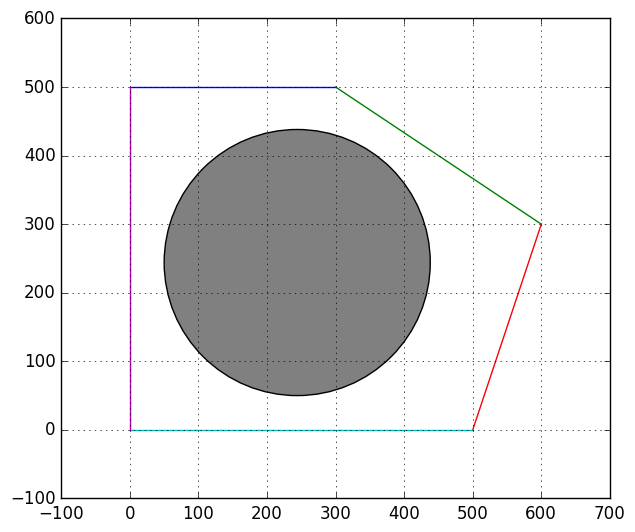

(-100,700)

In [25]:
using PyPlot
plot([0,300],500 * ones(2))
plot([300,600],[500,300] )
plot([500,600],[0,300])
plot([0,500],[0,0])
plot([0,0],[0,500])
using PyCall
@pyimport matplotlib.patches as patch

ax = gca() # get current axes


r = r_val 
# coordinates of center
x = x_val[1]
y = x_val[2]

grid("on")
ax[:set_aspect]("equal") # if I comment this line an ellipse is plotted
c = patch.Circle([x,y],r,fc="grey")
ax[:add_artist](c)
ylim(-100,600)
xlim(-100,700)


# Question 4
## a.

In [15]:
demand = [43; 40; 36; 36; 35; 38; 41; 46; 49; 48; 47; 47;
          48; 46; 45; 47; 50; 63; 75; 75; 72; 66; 57; 50]
battery_size = 30
m = Model()

@variable(m, out_flow[1:25] >= 0)
@variable(m, low_power[1:25] >=0)
@variable(m, high_power[1:25] >= 0)

#dummy constraints
@constraint(m, low_power[1] == 0)
@constraint(m, high_power[1] == 0)
@constraint(m, out_flow[1] == 0)

#low power constraint
@constraint(m, low_power .<= 50)

#total_power constrain
@constraint(m, low_power + high_power .<= 65)

#flow constraints
for i in 2:25
    @constraint(m, out_flow[i] == low_power[i] + high_power[i] + out_flow[i-1] - demand[i-1])
end
@constraint(m, out_flow .<= battery_size)
@objective(m, Min, sum(low_power) * 100 + sum(high_power) * 400)

solve(m)




:Optimal

Total cost

In [16]:
getobjectivevalue(m)

143400.0

Now calculate without battery

In [17]:
battery_size = 0
m = Model()

@variable(m, out_flow[1:25] >= 0)
@variable(m, low_power[1:25] >=0)
@variable(m, high_power[1:25] >= 0)

#dummy constraints
@constraint(m, low_power[1] == 0)
@constraint(m, high_power[1] == 0)
@constraint(m, out_flow[1] == 0)

#low power constraint
@constraint(m, low_power .<= 50)

#total_power constraint set back to 75
@constraint(m, low_power + high_power .<= 75)

#flow constraints
for i in 2:25
    @constraint(m, out_flow[i] == low_power[i] + high_power[i] + out_flow[i-1] - demand[i-1])
end
@constraint(m, out_flow .<= battery_size)
@objective(m, Min, sum(low_power) * 100 + sum(high_power) * 400)

solve(m)



:Optimal

In [18]:
getobjectivevalue(m)

152400.0

So we save

In [19]:
152400.0 - 143400.0

9000.0

## b.
Now if our battery has infinite capacity

In [20]:
m = Model()

@variable(m, out_flow[1:25] >= 0)
@variable(m, low_power[1:25] >=0)
@variable(m, high_power[1:25] >= 0)

#dummy constraints
@constraint(m, low_power[1] == 0)
@constraint(m, high_power[1] == 0)
@constraint(m, out_flow[1] == 0)

#low power constraint
@constraint(m, low_power .<= 50)

#total_power constrain
@constraint(m, low_power + high_power .<= 65)

#flow constraints
for i in 2:25
    @constraint(m, out_flow[i] == low_power[i] + high_power[i] + out_flow[i-1] - demand[i-1])
end

#Remove battery constraint
#@constraint(m, out_flow .<= battery_size)

@objective(m, Min, sum(low_power) * 100 + sum(high_power) * 400)

solve(m)


:Optimal

The cost becomes

In [21]:
getobjectivevalue(m)

120000.0

So we save

In [22]:
152400 - 120000.0

32400.0

then the most capacity used by the battery at any time is 

In [23]:
power_drawn = getvalue(low_power) + getvalue(high_power)
stored = 0
max_stored = -1
for i in 2:25
    stored = stored +  power_drawn[i] - demand[i-1]
    max_stored = max(max_stored, stored)
end
println(max_stored)

108.0


## c.

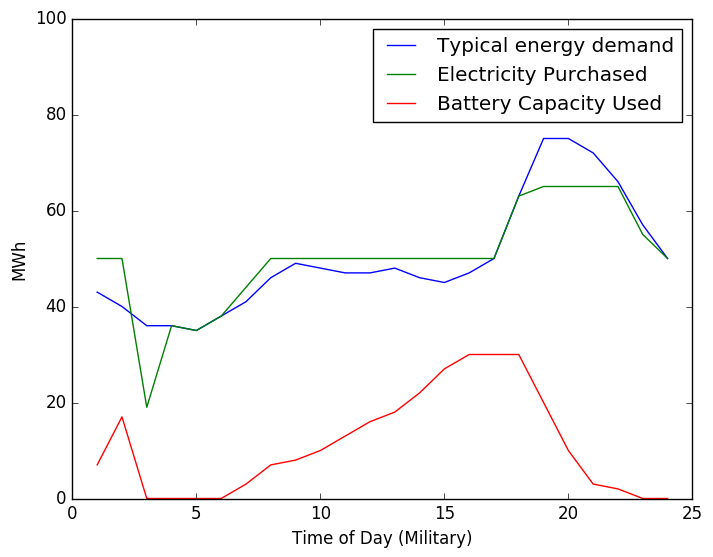

PyObject <matplotlib.legend.Legend object at 0x7f3735335c18>

In [24]:
demand = [43; 40; 36; 36; 35; 38; 41; 46; 49; 48; 47; 47;
          48; 46; 45; 47; 50; 63; 75; 75; 72; 66; 57; 50]
battery_size = 30
m = Model()

@variable(m, out_flow[1:25] >= 0)
@variable(m, low_power[1:25] >=0)
@variable(m, high_power[1:25] >= 0)

#dummy constraints
@constraint(m, low_power[1] == 0)
@constraint(m, high_power[1] == 0)
@constraint(m, out_flow[1] == 0)

#low power constraint
@constraint(m, low_power .<= 50)

#total_power constrain
@constraint(m, low_power + high_power .<= 65)

#flow constraints
for i in 2:25
    @constraint(m, out_flow[i] == low_power[i] + high_power[i] + out_flow[i-1] - demand[i-1])
end
@constraint(m, out_flow .<= battery_size)
@objective(m, Min, sum(low_power) * 100 + sum(high_power) * 400)

solve(m)

t = 1:24

electricity_purchased = (getvalue(low_power) + getvalue(high_power))[2:25]

battery_capacity_used = zeros(24)

used = 0
for i in 1:24
    used = electricity_purchased[i] + used - demand[i]
    battery_capacity_used[i] = used
end


plot(t,demand, label="Typical energy demand")
plot(t,electricity_purchased, label="Electricity Purchased")
plot(t, battery_capacity_used, label="Battery Capacity Used")

ylim(0,100)

ylabel("MWh")
xlabel("Time of Day (Military)")

legend()


## d.

The solution I found  for part a. was not unique. You can tell this from the plot above. I could have purchased more electricity around the 5 hour mark without going into high cost power and I could have stored it since I was well below 30 MWh of storage at that time. This extra storage could have replaced some of the electricity puchased around the 15 hour mark and still supplied the demand for the same cost. I could find another solution by constraing electricity purchased around the 15 hour mark to be less than 50 MWh, solving for the new problem and verifying that I get the same final cost as before.

But in the solution for part b. there is only one unique solution. This is because the optimal solution has you purchasing 50 MWh each hour. This gives you the exact amount of electricity to supply the demand for the entire day. Any other parameter setting would cause you to start purchasing high cost power which would result in a non optimal solution.